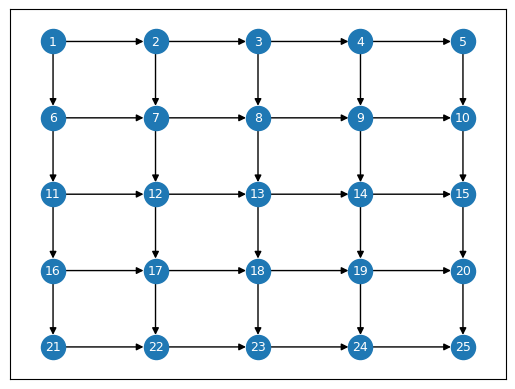

In [1]:
%run utils.py
G,pos = generate_gridNet(5, 5, "Network_5_5.tntp", draw=True, bi_direct=True)

In [ ]:
%run utils.py

dim1 = 5
dim2 = 5
origins = [i for i in range(1,dim1*dim2+1) if (i%dim1!=0)]
dest = [i for i in range(1,dim1*dim2+1) if (i%dim1!=1)]

OD_pairs = get_fullOD_pairs(dim1, dim2)

# Create 10000 entries 
out = generate_Random_ODs(dim1, dim2, 10000, origins, dest, OD_pairs, 'stats_10000_4.pkl')

## Fusion of files

In [1]:
import pickle
a_file = open("stats_10000_1.pkl", "rb")

output = pickle.load(a_file)
a_file.close()

S = 0
for k,v in output.items() :
    S = S + len(v)
print(len(output))
print(S)

a_file2 = open("stats_10000_2.pkl", "rb")

output2 = pickle.load(a_file2)
a_file2.close()

S = 0
for k,v in output2.items() :
    S = S + len(v)
print(len(output2))
print(S)

a_file3 = open("stats_10000_3.pkl", "rb")

output3 = pickle.load(a_file3)
a_file3.close()

S = 0
for k,v in output3.items() :
    S = S + len(v)
print(len(output3))
print(S)

a_file4 = open("stats_10000_4.pkl", "rb")

output5 = pickle.load(a_file4)
a_file4.close()

S = 0
for k,v in output5.items() :
    S = S + len(v)
print(len(output5))
print(S)

385
10000


In [6]:
output4 = {}
                
output4 = fuse_stats(output4, output)
output4 = fuse_stats(output4, output2)
output4 = fuse_stats(output4, output3)
output4 = fuse_stats(output4, output5)

S = 0
for k,v in output4.items() :
    S = S + len(v)
print(len(output4))
print(S)

In [14]:
# save fused file
file = open("stats_40000_1.pkl", "wb")
pickle.dump(output4 , file)
file.close()

## Flow network : Solving

In [1]:
%run utils.py

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('Network_5_5.tntp')
Network

,~,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type,;,link_id
0,NaN,1,2,2000,40,0.6,0.15,4,60,0,0,;,0
1,NaN,2,1,2000,40,0.6,0.15,4,60,0,0,;,1
2,NaN,1,6,2000,40,0.6,0.15,4,60,0,0,;,2
3,NaN,6,1,2000,40,0.6,0.15,4,60,0,0,;,3
4,NaN,2,3,2000,40,0.6,0.15,4,60,0,0,;,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,23,22,2000,40,0.6,0.15,4,60,0,0,;,75
76,NaN,23,24,2000,40,0.6,0.15,4,60,0,0,;,76
77,NaN,24,23,2000,40,0.6,0.15,4,60,0,0,;,77
78,NaN,24,25,2000,40,0.6,0.15,4,60,0,0,;,78


In [ ]:
import pickle

with open('stats_40000_1.pkl', "rb") as a_file:
    stats = pickle.load(a_file)
    a_file.close()
a = list(stats.values())
count = 0
count2 = 0
for i in range(len(a)):
    print(i)
    count2+=len(a[i])
    print(count2)

In [5]:
from utils import *

# This file contain 385 OD matrix
a_file = open('stats_40000_1.pkl', "rb")
stats = pickle.load(a_file)
a_file.close()

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('Network_5_5.tntp')
# print(Network)

time = 17051
for val in list(stats.values())[165:]:
    for OD_matrix in val :
        print(time)
        data, Q, OD, O_D,n = get_data(Network, Nodes, links, cap, fft, alpha, beta, lengths, OD_matrix )
        flows, li, status, sol_time = TA_UE(data, n, OD, Q)
        if status == 2 : # if model solved to optimality => save data, flows, links, status, sol_time
            dataa = {'data' : data, 'path_flow' : flows, 'link_flow' : li, 'model_status': status, 'solving_time':sol_time}
            file_data = open("../Output/5by5_Data{}".format(time), "wb")
            pickle.dump(dataa , file_data)
            file_data.close()
            time += 1
        else : 
            print("Error ! Networks details :")
            print(OD_matrix)
            print("*****************************")

17051
model solved in: 0.03531312942504883
17052
model solved in: 0.041224002838134766
17053
model solved in: 0.0341801643371582
17054
model solved in: 0.03795313835144043
17055
model solved in: 0.03590703010559082
17056
model solved in: 0.031677961349487305
17057
model solved in: 0.02927994728088379
17058
model solved in: 0.03961300849914551
17059
model solved in: 0.0348663330078125
17060
model solved in: 0.03435707092285156
17061
model solved in: 0.035169124603271484
17062
model solved in: 0.03311491012573242
17063
model solved in: 0.03362631797790527
17064
model solved in: 0.037841081619262695
17065
model solved in: 0.03703117370605469
17066
model solved in: 0.039132118225097656
17067
model solved in: 0.032402992248535156
17068
model solved in: 0.029779911041259766
17069
model solved in: 0.03399491310119629
17070
model solved in: 0.036827802658081055
17071
model solved in: 0.03708815574645996
17072
model solved in: 0.05217099189758301
17073
model solved in: 0.03140115737915039
17074